In [17]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
def imshow2(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image
from sklearn.metrics import roc_curve, auc

In [30]:
##Image Augmentation ###Easier way to do it below

train_datagen = ImageDataGenerator(
    rescale = 1./255, ##normalize,
        fill_mode='nearest',)

training_set = train_datagen.flow_from_directory(
        r"ASD\AugTrainTest\train",
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary',
        
        )

test_datagen = ImageDataGenerator(
        rescale=1./255, )

testing_set = test_datagen.flow_from_directory(
        r"ASD\AugTrainTest\test",
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary')

training_set.class_indices

Found 2039 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


{'Control': 0, 'Patient': 1}

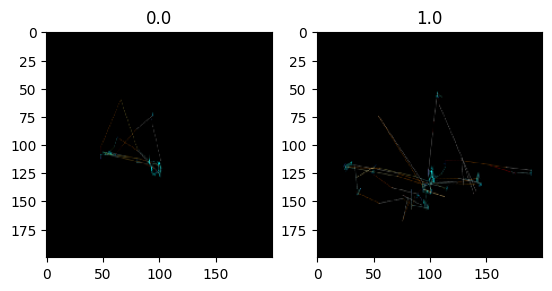

In [31]:
# get a batch of images and labels from the training set
images, labels = next(training_set)
# create a figure with 2x2 grid of subplots
fig, axes = plt.subplots(1, 2)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])

# show the figure
plt.show()

In [60]:
##Defining the Network 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu', input_shape=[200,200,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units= 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 48, 48, 32)       

In [36]:
## Training
history = cnn.fit(x=training_set, validation_data=testing_set, epochs = 10)

Epoch 1/10
64/64 [==============================] - 22s 337ms/step - loss: 0.0425 - accuracy: 0.9887
Epoch 2/10
64/64 [==============================] - 21s 329ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 3/10
64/64 [==============================] - 21s 332ms/step - loss: 0.0244 - accuracy: 0.9902
Epoch 4/10
64/64 [==============================] - 21s 328ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 5/10
64/64 [==============================] - 22s 341ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 6/10
64/64 [==============================] - 22s 349ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 22s 337ms/step - loss: 0.0149 - accuracy: 0.9975
Epoch 8/10
64/64 [==============================] - 22s 337ms/step - loss: 0.0194 - accuracy: 0.9946
Epoch 9/10
64/64 [==============================] - 22s 335ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 10/10
64/64 [==============================] - 22s 341ms/step - loss: 0.0015 - accura

KeyError: 'val_accuracy'

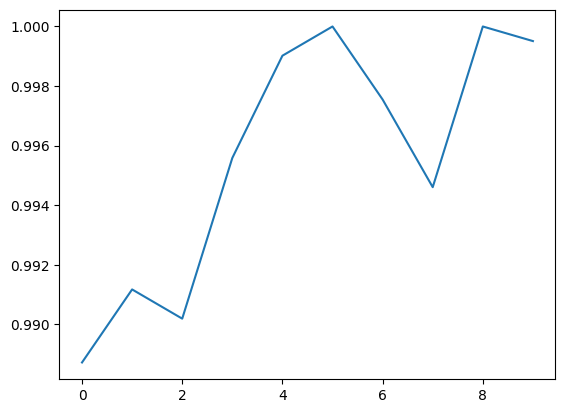

In [37]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

C:\Users\786me\AppData\Local\Temp\ipykernel_15224\1906504400.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = cnn.predict_generator(testing_set, testing_set.samples // testing_set.batch_size+1)


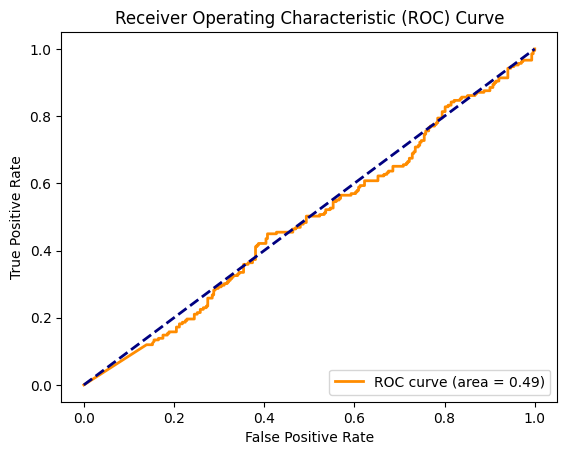

In [38]:
from sklearn.metrics import roc_curve, auc
y_pred = cnn.predict_generator(testing_set, testing_set.samples // testing_set.batch_size+1)
y_true = testing_set.classes

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score

In [62]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r"ASD\Augmented",
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"ASD\Augmented", # same directory as training data
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='validation') # set as validation data


Found 2041 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


In [63]:

cnn.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


C:\Users\786me\AppData\Local\Temp\ipykernel_15224\1395367988.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(


Epoch 1/10
63/63 [==============================] - 26s 391ms/step - loss: 0.5578 - accuracy: 0.7108 - val_loss: 0.5234 - val_accuracy: 0.7542
Epoch 2/10
63/63 [==============================] - 24s 375ms/step - loss: 0.4226 - accuracy: 0.8094 - val_loss: 0.4707 - val_accuracy: 0.7833
Epoch 3/10
63/63 [==============================] - 26s 411ms/step - loss: 0.3241 - accuracy: 0.8626 - val_loss: 0.4594 - val_accuracy: 0.7729
Epoch 4/10
63/63 [==============================] - 24s 373ms/step - loss: 0.2110 - accuracy: 0.9223 - val_loss: 0.4874 - val_accuracy: 0.7875
Epoch 5/10
63/63 [==============================] - 25s 390ms/step - loss: 0.1171 - accuracy: 0.9647 - val_loss: 0.6228 - val_accuracy: 0.7854
Epoch 6/10
63/63 [==============================] - 24s 378ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.7331 - val_accuracy: 0.7771
Epoch 7/10
63/63 [==============================] - 23s 371ms/step - loss: 0.0499 - accuracy: 0.9866 - val_loss: 0.7556 - val_accuracy: 0.7979

In [66]:
# make predictions on validation set
Y_pred = cnn.predict_generator(validation_generator, steps=len(validation_generator))
# get predicted classes
y_pred = np.argmax(Y_pred, axis=1)
# get true classes
y_true = validation_generator.classes
# get class names
class_names = list(validation_generator.class_indices.keys())
class_names
from sklearn.metrics import classification_report, roc_auc_score
# calculate and print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))
# calculate and print AUC score
print('AUC Score:', roc_auc_score(y_true, Y_pred))


C:\Users\786me\AppData\Local\Temp\ipykernel_15224\2152713607.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn.predict_generator(validation_generator, steps=len(validation_generator))


Classification Report:
              precision    recall  f1-score   support

     Control       0.59      1.00      0.74       301
     Patient       0.00      0.00      0.00       208

    accuracy                           0.59       509
   macro avg       0.30      0.50      0.37       509
weighted avg       0.35      0.59      0.44       509

AUC Score: 0.5336298875543062


C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

AUC Score: 0.5089125990288781


In [2]:
##Treying grayscale
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=to_grayscale_then_rgb, 
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r"ASD\Augmented",
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"ASD\Augmented", # same directory as training data
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='validation') # set as validation data

Found 2041 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


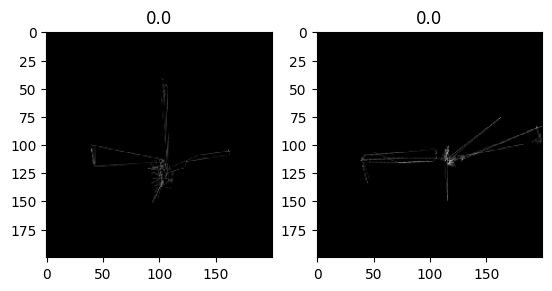

In [70]:
# get a batch of images and labels from the training set
images, labels = next(train_generator)
# create a figure with 2x2 grid of subplots
fig, axes = plt.subplots(1, 2)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])

# show the figure
plt.show()

In [71]:
cnn.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 10)


C:\Users\786me\AppData\Local\Temp\ipykernel_15224\2205614483.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(


Epoch 1/10
63/63 [==============================] - 32s 500ms/step - loss: 0.0384 - accuracy: 0.9861 - val_loss: 1.1434 - val_accuracy: 0.7667
Epoch 2/10
63/63 [==============================] - 30s 480ms/step - loss: 0.0363 - accuracy: 0.9905 - val_loss: 0.9603 - val_accuracy: 0.7792
Epoch 3/10
63/63 [==============================] - 31s 486ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.9271 - val_accuracy: 0.7896
Epoch 4/10
63/63 [==============================] - 31s 485ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 1.1784 - val_accuracy: 0.7833
Epoch 5/10
63/63 [==============================] - 30s 472ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 1.1640 - val_accuracy: 0.7958
Epoch 6/10
63/63 [==============================] - 30s 474ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.1866 - val_accuracy: 0.8062
Epoch 7/10
63/63 [==============================] - 29s 458ms/step - loss: 7.9089e-04 - accuracy: 1.0000 - val_loss: 1.3006 - val_accuracy: 0.

In [11]:
##Trying other loss function 
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r"ASD\Augmented",
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"ASD\Augmented", # same directory as training data
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 2041 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


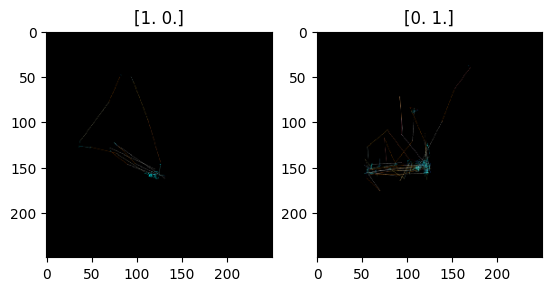

In [12]:
#Unnormalized
images, labels = next(train_generator)
fig, axes = plt.subplots(1, 2)
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])
# show the figure
plt.show()
    

In [19]:
##Defining the Network 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu', input_shape=[250,250,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units= 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units= 2, activation = 'softmax'))
##softmax
from tensorflow.keras.metrics import  Precision, Recall, AUC, Accuracy, binary_focal_crossentropy
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=1e-06)
cnn.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])

In [20]:
history = cnn.fit(train_generator, validation_data=validation_generator, epochs = 20)

Epoch 1/20
64/64 [==============================] - 34s 511ms/step - loss: 0.1728 - accuracy: 0.4851 - val_loss: 0.1719 - val_accuracy: 0.4971
Epoch 2/20
64/64 [==============================] - 31s 484ms/step - loss: 0.1705 - accuracy: 0.5296 - val_loss: 0.1700 - val_accuracy: 0.5363
Epoch 3/20
64/64 [==============================] - 31s 491ms/step - loss: 0.1680 - accuracy: 0.5914 - val_loss: 0.1681 - val_accuracy: 0.6071
Epoch 4/20
64/64 [==============================] - 31s 481ms/step - loss: 0.1655 - accuracy: 0.6311 - val_loss: 0.1660 - val_accuracy: 0.6503
Epoch 5/20
64/64 [==============================] - 31s 487ms/step - loss: 0.1628 - accuracy: 0.6899 - val_loss: 0.1638 - val_accuracy: 0.6758
Epoch 6/20
64/64 [==============================] - 31s 483ms/step - loss: 0.1601 - accuracy: 0.6982 - val_loss: 0.1618 - val_accuracy: 0.6994
Epoch 7/20
64/64 [==============================] - 32s 503ms/step - loss: 0.1580 - accuracy: 0.7036 - val_loss: 0.1599 - val_accuracy: 0.7014

16/16 [==============================] - 3s 159ms/step
[[207  94]
 [137  71]]


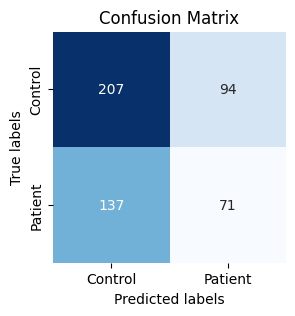

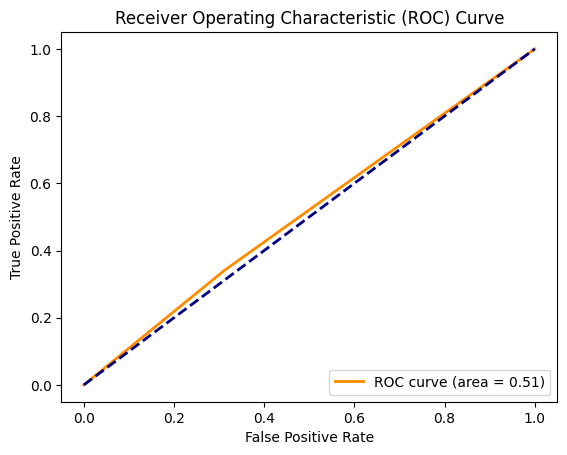

In [21]:
##Confusion Matrix Generator and ROC Curve
y_pred = cnn.predict(validation_generator)


In [ ]:

y_pred = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
tn, fp, fn, tp = confusion_matrix(validation_generator.classes, y_pred).ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

print(cm)
# Define the class labels
class_names = validation_generator.class_indices.keys()
import seaborn as sns
# Plot the confusion matrix as an image
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()